This script uses previously made files of AgingLists for META or REAN data sets.
If you did not compiled those files, run *make_aging_list.py* first

Here we make a pyramid draw for signature sets
all data originate from source file with 3 columns:
gene names, frequencies of appearance, average fold change
that source file is made with *make_aging_list.py*

First import needed packages

In [13]:
import matplotlib.pyplot as plt, math
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

open source file and read the data
below is reanalysed data set. Add a directory name to the file name if the source file is not in the same directory as this file. 
We will collect: 
all gene names: names
their frequencies of citation: freqs
their average fold change: folds

In [46]:
f_in=open("Aging_List_REAN.txt","r")
names,freqs,folds=[],[],[]
lines=f_in.readlines()
for line in lines[1:]: #skip the title line
    items=line.rstrip().split('\t')
    names.append(items[0])
    freqs.append(int(items[1]))
    folds.append(float(items[2])) 

If you want to use META data, use the block below

In [15]:
f_in=open("Aging_List_META.txt","r")
names,freqs,folds=[],[],[]
lines=f_in.readlines()
for line in lines[1:]:
    items=line.rstrip().split('\t')
    names.append(items[0])
    freqs.append(int(items[1]))
    folds.append(float(items[2]))

Check imported data

In [47]:
print("check data", len(names),len(freqs),len(folds))
print("check freqs groups", min(freqs), max(freqs))

check data 6259 6259 6259
check freqs groups 1 10


count number of positively and negatively changing genes in each frequency group

In [48]:
"generate freqs for pyramid"
negatives, positives, allnames=[],[],[]
for i in range(min(freqs),max(freqs)+1):
    pos,neg=[],[]
    for j in range(len(freqs)):
        if freqs[j]==i:
            if folds[j]>0:
                pos.append(names[j])
            else:
                neg.append(names[j])
    negatives.append(len(neg))
    positives.append(len(pos))
    allnames.append([pos,neg])
    

There might be many ways of drawing boxes, I use one of them, maybe not the shortest, but it worked. Plotting script works only with all components in one block. Therefore it comes as one block.

Ezh2  negative
Sell  negative
Ezh1  positive
Selp  positive


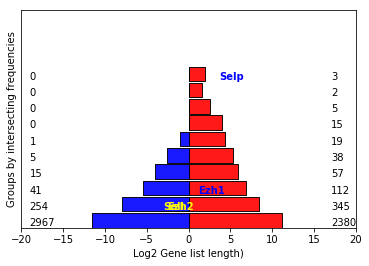

In [49]:
#make boxes for groups of frequencies, positive and negative separately

boxes=[] #boxes are for positive boxes
for i in range(len(positives)):
    rect = Rectangle((0,i*9), math.log2(positives[i]+1),8)
    boxes.append(rect)

fig, ax = plt.subplots()

    # Create patch collection with specified colour/alpha
pc = PatchCollection(boxes, facecolor="red", alpha=0.9,
                         edgecolor="black")

anti=[] #anti are for negative boxes
for i in range(len(negatives)):
    rect = Rectangle((0,i*9), -math.log2(negatives[i]+1),8)
    anti.append(rect)

ac = PatchCollection(anti, facecolor="blue", alpha=0.9,
                         edgecolor="black")

#here are declarations for x and y limits, also x and y labels
plt.xlim(-20,20)
plt.ylim(0,120)
plt.xlabel("Log2 Gene list length)")
plt.ylabel("Groups by intersecting frequencies")
plt.yticks([],[])

    # Add collection to axes
ax.add_collection(pc)
ax.add_collection(ac)

"show groups sizes"
for i in range(len(negatives)):
    plt.text(-19,i*9+1,negatives[i])
for i in range(len(positives)):
    plt.text(17,i*9+1,positives[i])


#here I select two names I want to see it on the pyramid plot
my_name=["Ezh1", "Ezh2" ,"Sell", "Sele","Selp"]
for i in range(len(allnames)):

    for name in my_name:
        if name in allnames[i][0]:
            pos = folds[names.index(name)] * 2
            print(name, " positive")
            plt.text(pos,i*9+1,name, color="blue", weight="bold") #was2
        if name in allnames[i][1]:
            pos = folds[names.index(name)] * 2
            print(name, " negative")
            plt.text(pos-1, i * 9 + 1, name, color="Yellow", weight="bold")
plt.show()

Pay attention to the WEB browser you use. I routinely use Safari in Mac